In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
#See orginal dataframe
df = pd.read_csv("/Users/jordankavishe/Desktop/semester5/data1030/midterm/support2.csv")
df.shape

(9105, 47)

# Deal with missing values where the feature has less than 100 instances of missing values

In [5]:
def find_nulls(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have more than n missing instances'''
    null_series = dataframe.isnull().sum().where(lambda x: x > n).dropna()
    return null_series


def find_null_ints(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have exactly n missing instances'''
    null_series_int = dataframe.isnull().sum().where(lambda x: x == n).dropna()
    null_series_int_list = null_series_int.index.to_list()
    return null_series_int, null_series_int_list

In [12]:
# Drop all the features with only one missing values
null_ones = df.isnull().sum().where(lambda x: x == 1).dropna().index.to_list()
df.dropna(subset=null_ones, inplace=True)
print(df.shape)

# Drop all the features with less than 100 missing values
null_greater_than_one = find_nulls(df, 0).where(lambda x: x < 100).dropna().index.to_list()
df.dropna(subset=null_greater_than_one, inplace=True)
print(df.shape)

values = {'alb': 3.5, 'pafi' : 333.3, 'bili' : 1.01, 'crea' : 1.01, 'bun' : 6.51, 'wblc' : 9, 'urine' : 2502, 'ph' : 7.415534, 
          'glucose' : 159.640000, 'adlp' : 1.162239, 'adls' : 1.621342, 'totcst' : 30241.998476, 'prg2m' : 0.700000, 'prg6m' :0.500000}
df.fillna(value=values, inplace=True)

(9103, 47)

# EDA

In [29]:
# Total hospital deaths by race
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    print(f"{r} total deaths: {death_count}")


white total deaths: 1310
hispanic total deaths: 60
other total deaths: 16
asian total deaths: 19
black total deaths: 255


In [30]:
# Total death rate by race
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    total_amount = df[df["race"] == r].shape[0]
    death_rate = death_count / total_amount 
    print(f"{r} death rate: {death_rate}")

white death rate: 0.254319549602019
hispanic death rate: 0.2643171806167401
other death rate: 0.2807017543859649
asian death rate: 0.3877551020408163
black death rate: 0.272145144076841


Text(0.5, 1.0, 'Hospital Death Rate by Race')

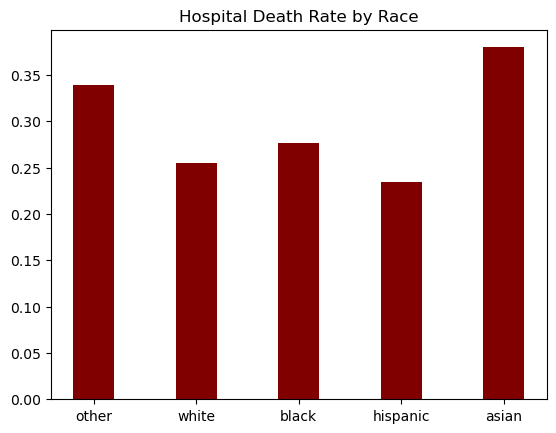

In [31]:
# Bar graph showing total death rate by race
data = {
    'other': 0.3394495412844037, 
    'white': 0.2552889393724265,
    'black': 0.2765179224579371,
    'hispanic': 0.23448275862068965,
    'asian': 0.379746835443038
}

hospdead_percents = pd.DataFrame(list(data.items()), columns=['Race', 'Percent'])

data

races = data.keys()
hospdead_rate = data.values()
plt.bar(races, hospdead_rate, color ='maroon', 
        width = 0.4)
plt.title('Hospital Death Rate by Race')

white death rate: 0.7891566265060241
hispanic death rate: 0.03614457831325301
other death rate: 0.00963855421686747
asian death rate: 0.01144578313253012
black death rate: 0.1536144578313253


Text(0.5, 1.0, 'Hospital Death Rate (Overall) by Race')

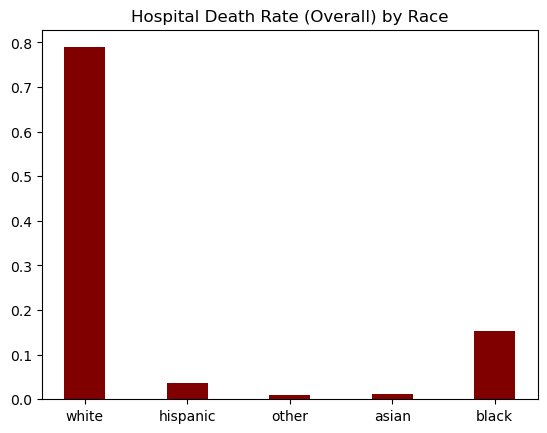

In [33]:
# Overall death rate broken down by race
overall_death = {}
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    total_amount = df[df['hospdead'] == 1].shape[0]
    death_rate = death_count / total_amount 
    overall_death[r] = death_rate
    print(f"{r} death rate: {death_rate}")

overall_death


races = overall_death.keys()
hospdead_rate = overall_death.values()
plt.bar(races, hospdead_rate, color ='maroon', 
        width = 0.4)
plt.title('Hospital Death Rate (Overall) by Race')

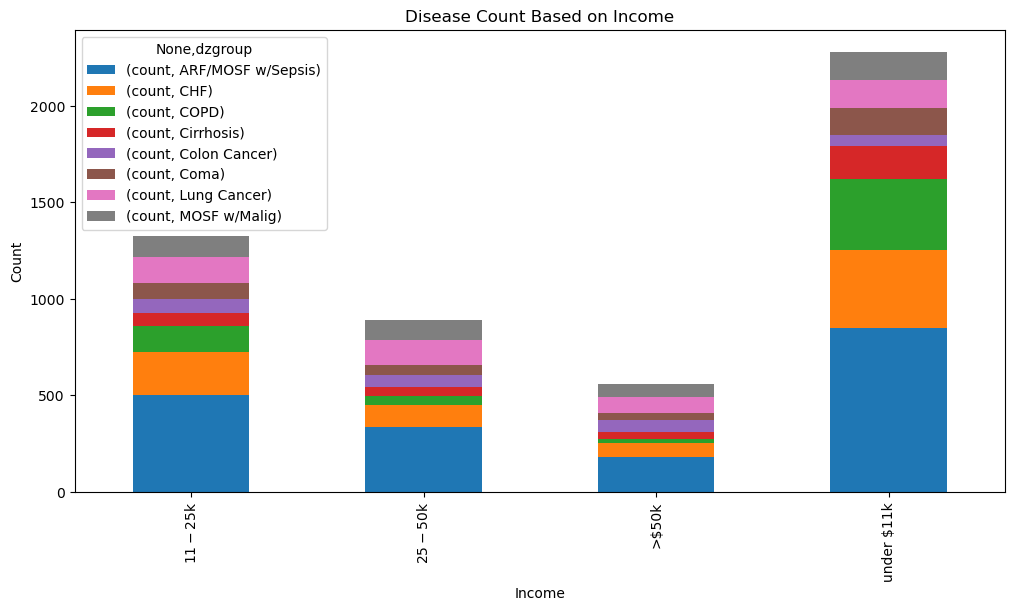

In [36]:
# Diseases of patients recorded by income level
income_df = df.groupby(by=['income'])
income_df = income_df['dzgroup'].value_counts().to_frame().unstack()
income_df.reset_index(inplace=True)
income_df

income_df.plot(kind='bar', x='income', stacked=True, figsize=(12, 6))
plt.title('Disease Count Based on Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


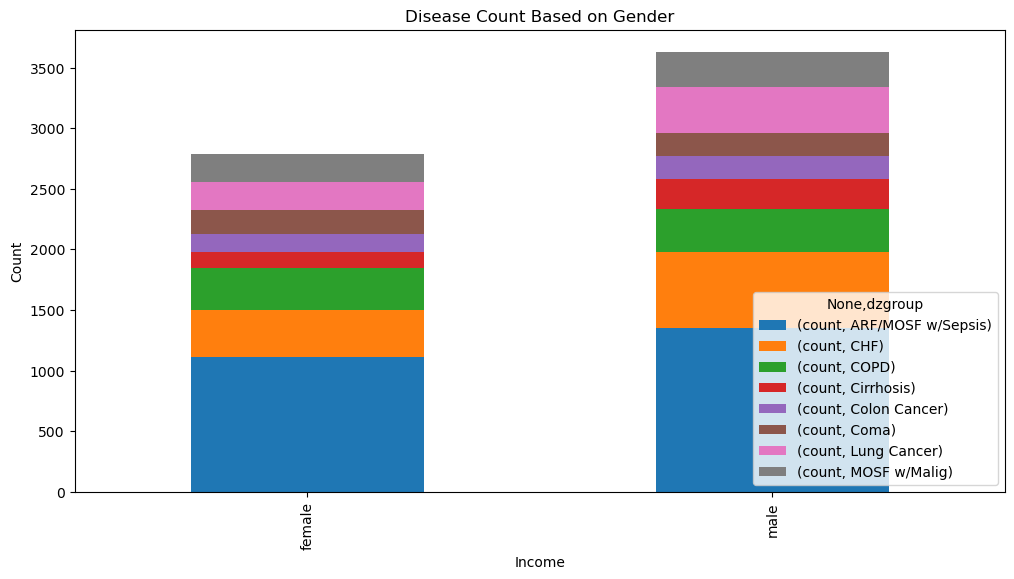

In [38]:
# Diseases of patients recorded by sex

gender_df = df.groupby(by=['sex'])
gender_disease_df = gender_df['dzgroup'].value_counts().to_frame().unstack()
gender_disease_df.reset_index(inplace=True)


gender_by_disease_df = gender_disease_df.plot(kind='bar', x='sex', stacked=True, figsize=(12, 6))
plt.title('Disease Count Based on Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


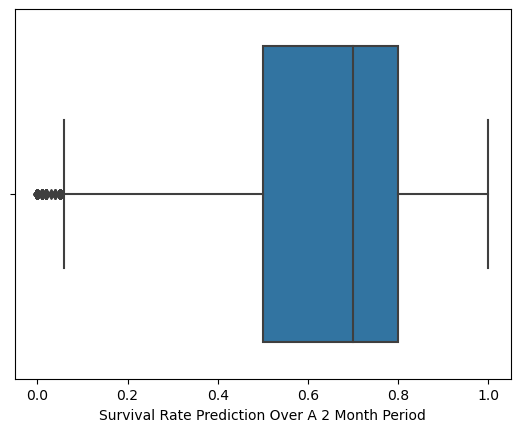

In [42]:
sns.boxplot(data=df, x='prg2m')
plt.xlabel("Survival Rate Prediction Over A 2 Month Period")
plt.show()

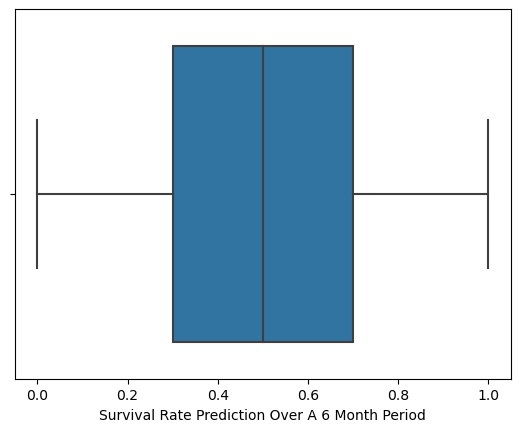

In [44]:
sns.boxplot(data=df, x='prg6m')
plt.xlabel("Survival Rate Prediction Over A 6 Month Period")
plt.show()